**Actividad Semanal 5: Data Analysis with Python**

Por:

Héctor Raúl Vázquez Gléz. (A00565542)

Pre-procesamiento de Datos:

El preprocesamiento de datos es necesario ya que la información como se obtiene del mundo real no siempre está completa o es del todo correcta.

Valores Faltantes:

Uno de los casos más comunes cuando se recupera información del mundo real es; que la información no está completa.

En python, esto puede estar representado por "NaN", "?" o un espacio en blanco.

Las tres formas más comunes de tratar con información perdida son:

- Eliminar la fila de la información.
- Eliminar la columna con la información faltante.
- Tratar de llenar la información faltante.

En el caso de llenar la información, es necesario hacerlo de varias formas dependiendo del tipo de inromación a rellenar.

Por ejemplo, Si estamos llenando el rendimiento de automóviles por litro de gasolina, es un valor continuo que podremos estimar con un promedio de todos los valores de la tabla. Por otro lado, si estamos llenando el valor de si este auto consume gasolina o dissel (Que es un valor catagórico) se puede usar la moda de la tabla para estimar el valor perdido.

En el caso de que se decida eliminar la información que contiene los valores perdidos, python tiene la función "dropna" con la cual se pueden eliminar filas o Columnas que contengan valores nulos.

In [ ]:
dataframe.dropna() #Se necesita especificar en "axis"
                    #axis = 0 elimina la fila
                    #axis = 1 elimina la columna
                    #inplace = True hace que los cambios se apliquen al dataframe

NameError: ignored

Para reemplazar los valores nulos, python tiene la función "replace" que toma dos parámetros; "Valor a reemplazar" y "Valor nuevo". Por tanto, si queremos reemplazar los valores nulos con el promedio podemos hacer algo como lo siguiente:

In [ ]:
promedio = df["Columna"].mean() #Primero calculamos el promedio de la columna
df["Columna"].replace(np.nan, promedio) #Se reemplaza el valos nulo por el valor de la variable promedio

En caso de que se quiera aplicar una operación a toda un columna, en python puede resultar fácil de hacer, por ejemplo:

In [ ]:
df["Columna"] = df["Columna"] + 25 #suma 25 a cada valor de la columna

Cuando importas la inforamción a un dataframe de python, este los puede interpretar de una manera equivocada, por ejempo, una columna de "precio" que normalmente se trabajaría como un "float", python podría reconoserla como de tipo "objeto". Este error es muy común, y puede provocar que modelos de machine learning se comporte de maneras no deseadas. 

In [ ]:
#Para identificar los typos de datos de un dataframe se puede usar:
dataframe.dtypes()

#Para cambiar el tipo de dato de alguna colmuna, se puede usar:
dataframe.astype()
df["price"] = df["price"].astype("float")

Cuando se tienen dos datos que se van a utilizar en modelos de análisis, por ejemplo datos de montos de crédito y edades donde un dato se mueve en el orden de mles mientras otro se mueve del 0 al 100, nuestro modelo puede prioritizar un dato sobre el otro. En este caso se prioritizaría al monto por ser más grande.

Para evitar este caso, existen procesos de normalización, el cual nos mueve los datos originales a un mismo rango consevando la varianza de los datos.

Binning

La técnica de binning consiste en especificar los rangos en los cuales se quiere clasificar cierta información. Por ejemplo, si se quiere clasificar la columna precio de un dataframe

In [ ]:
bins = np.linspace(min(df["price"]), max(df["price"]),4) #esto creará tres espacios iguales desde el mínimo hasta el máximo de precios
names = ["barato", "medio", "caro"] #En caso de que se quiera poner nombres, primero los guardamos en un arreglo
df["price-binned"] = pd.cut(df["price"],bins,labels= names, include_lowest= True) #Agregamos los valores escritos en una nueva columna según su clasificación

**Convertir Valores Categóricos en numéricos**

Este tema puede parece muy intuitivo y fácil. Pero nuestra primera opción puede meter información erronea a nuestro modelo.

Por ejemplo, en caso de que se tenga un columna "Paises" con los valores; "México", "Argentina", "Brazil", "Costa Rica". Lo primero que viene a la mente es sustituir los valores por números diferentes para cada país. Esto está equivocado. en el caso de:

- México = 1
- Argentina = 2
- Brazil = 3
- Costa Rica = 4

Le estaríamos diciendo a nuestro modelo que:
- México está muy cerca de Argentina
- La distancia entre México y Costa Rica es mayor que México y Argentina
- Costa Rica es mayor que Brazil

Entre muchas cosas más que nuestro modelo puede asumir al introducir estos datos.

La manera correcta de convertir un dato catégorico en númerico es mediante el uso de una matríz y el uso de 1s y 0s, como se muestra en la siguiente forma:

 México | Argentina | Brazil | Costa Rica
    1   |     0     |    0   |      0
    0   |     1     |    0   |      0
    0   |     0     |    1   |      0
    0   |     0     |    0   |      1

De esta forma no estamos introduciendo informaciòn erronea adicional al modelo. En python esta matriz se puede generar automáticamente con el comando:

In [ ]:
pd.getdummies( df["Pais"])

**Evidencia de Avance y Preguntas**

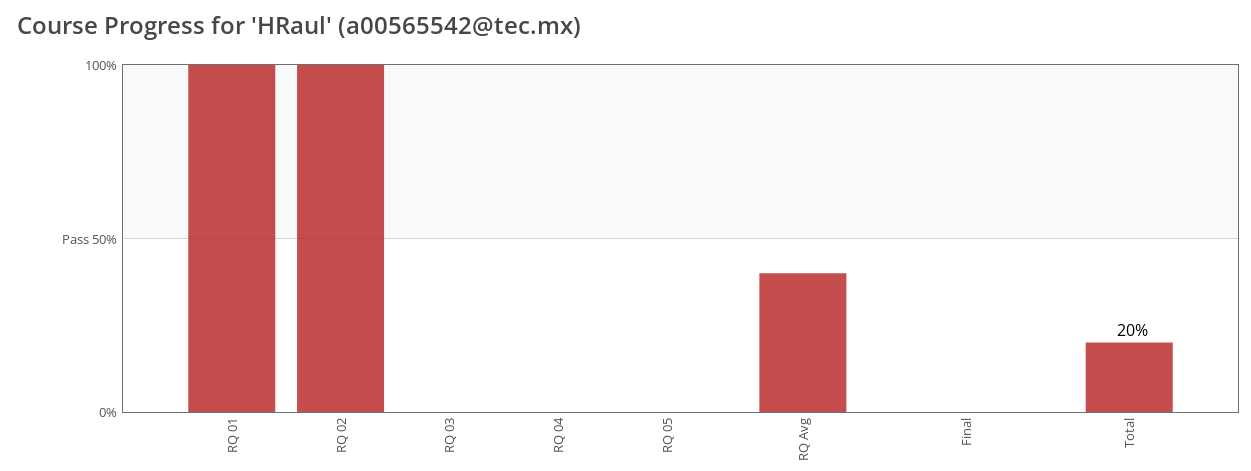

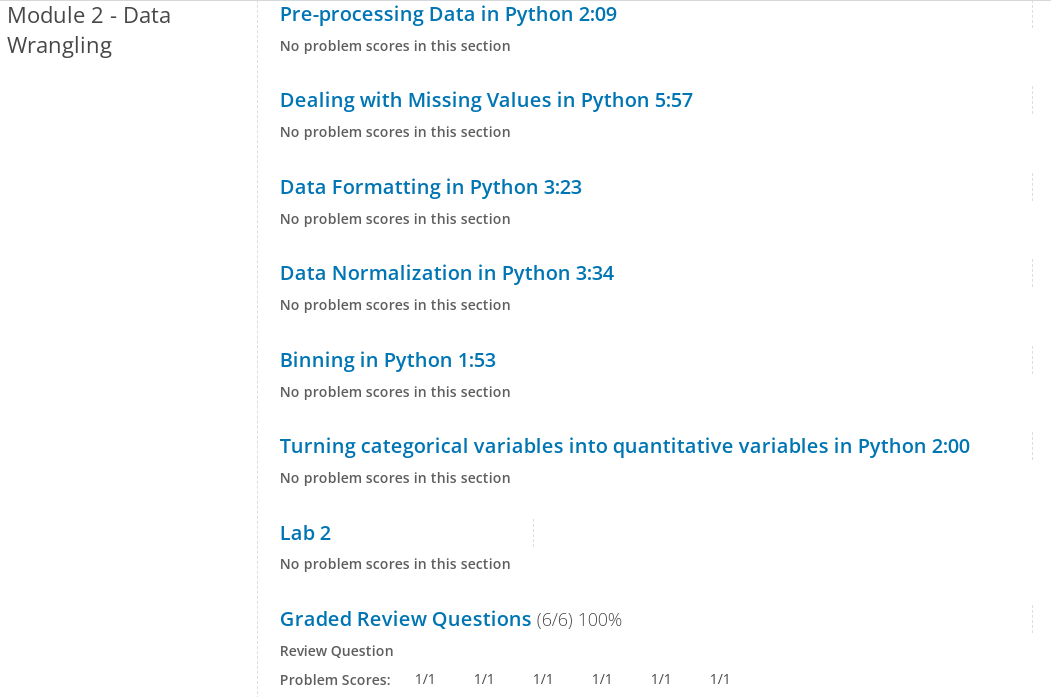